In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

from fooof import FOOOFGroup

from om.plts.meg import plot_osc_profiles, plot_all_oscs_single

In [3]:
#dat_path = '/Users/tom/Desktop/EEGMapping_local/Rest_Results/'
dat_path = '/Users/tom/Desktop/EEGMapping_local/Trial_Results/'

In [4]:
subj_files = os.listdir(dat_path)
subj_files = [file for file in subj_files if '0.json' in file]

In [5]:
##
##
centers_all = []
centers_hists = []

fg = FOOOFGroup()

for subj_file in subj_files:

    # Load FG
    fg.load(os.path.join(dat_path, subj_file))

    # Get peak params
    subj_centers = fg.get_all_data('peak_params')[:, 0]
    
    cens, _ = np.histogram(subj_centers, bins=np.arange(3, 40.25, 0.25))

    centers_all.extend(subj_centers)
    centers_hists.append(cens)

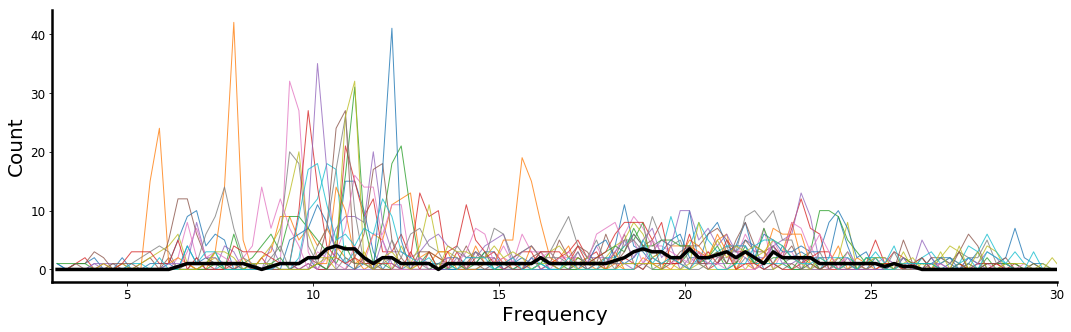

In [6]:
plot_osc_profiles(centers_hists, n_subj=int(len(subj_files)/2))
plt.savefig('OscProfiles.png', bbox_inches='tight', dpi=300)

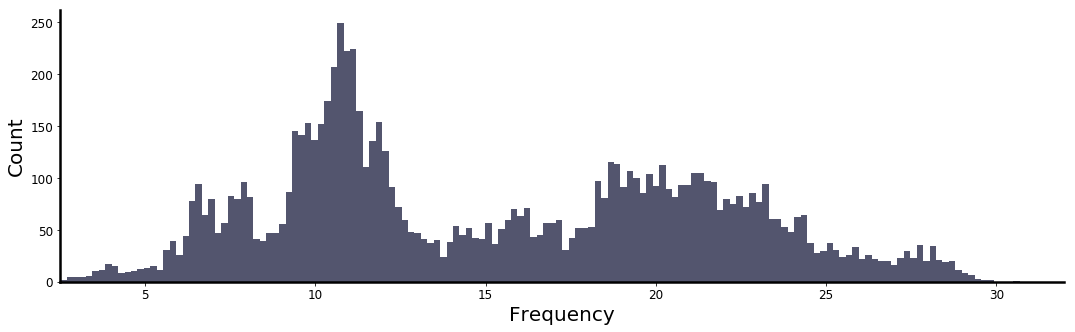

In [7]:
plot_all_oscs_single(centers_all, 0, 'CFs', n_bins=150, size=(18, 5), save_out=False)
plt.savefig('OscCenters.png', bbox_inches='tight', dpi=300)